In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Trainer

In [4]:
TRAINER_RESULTS = {
    # "MinAtar/DQN": "shapley/minatar_dqn/trainer_shapley_final.csv",
    # "MinAtar/Ordered/DQN[NR]": "shapley/minatar_ordered_dqn/trainer_nowak_radzik_final.csv",
    # "MinAtar/Ordered/DQN[SB]": "shapley/minatar_ordered_dqn/trainer_sanchez_bergantinos_final.csv",
    # "SparseIPD/PPO": "shapley/sipd_ppo/trainer_shapley_final.csv",
    # "SparseIPD/Ordered/PPO[NR]": "shapley/sipd_ordered_ppo/trainer_nowak_radzik_final.csv",
    # "SparseIPD/Ordered/PPO[SB]": "shapley/sipd_ordered_ppo/trainer_sanchez_bergantinos_final.csv"
        # "MinAtar/DQN": "shapley/minatar_dqn/trainer_shapley_final.csv",
    "MNIST/Adam": "shapley/mnist_sgd/trainer_shapley_final.csv",
}

In [209]:
def display_shapley(file: str, title: str, pure_only: bool=True):
    df = pd.read_csv(
        file,
        index_col=0
    )
    # only against pure eval strategies
    if pure_only:
        df.index = df.index.map(str)
        df = df[df.index]
    # plt.figure()
    with sns.plotting_context("notebook", font_scale=2.0): 
        plt.figure(figsize=(16,9))
        hm = sns.heatmap(
            df,
            cmap='viridis', 
            linewidths=0.01, 
            annot=True, 
            fmt='.5f',
            vmin=0, vmax=1
        )
        hm.set(xlabel="$EVAL$", ylabel="$SHAPLEY$", title=f"{title} - Shapley Values")
        # hm.autoscale(True)
        hm.tick_params(top=False, bottom=True,
                    labeltop=False, labelbottom=True)
        # plt.setp(hm.get_xticklabels(), rotation=90, ha="right",
        #             rotation_mode="anchor")
        for idx, _ in enumerate(df.columns):
            plt.gca().axvline(idx, lw=15, color='white')

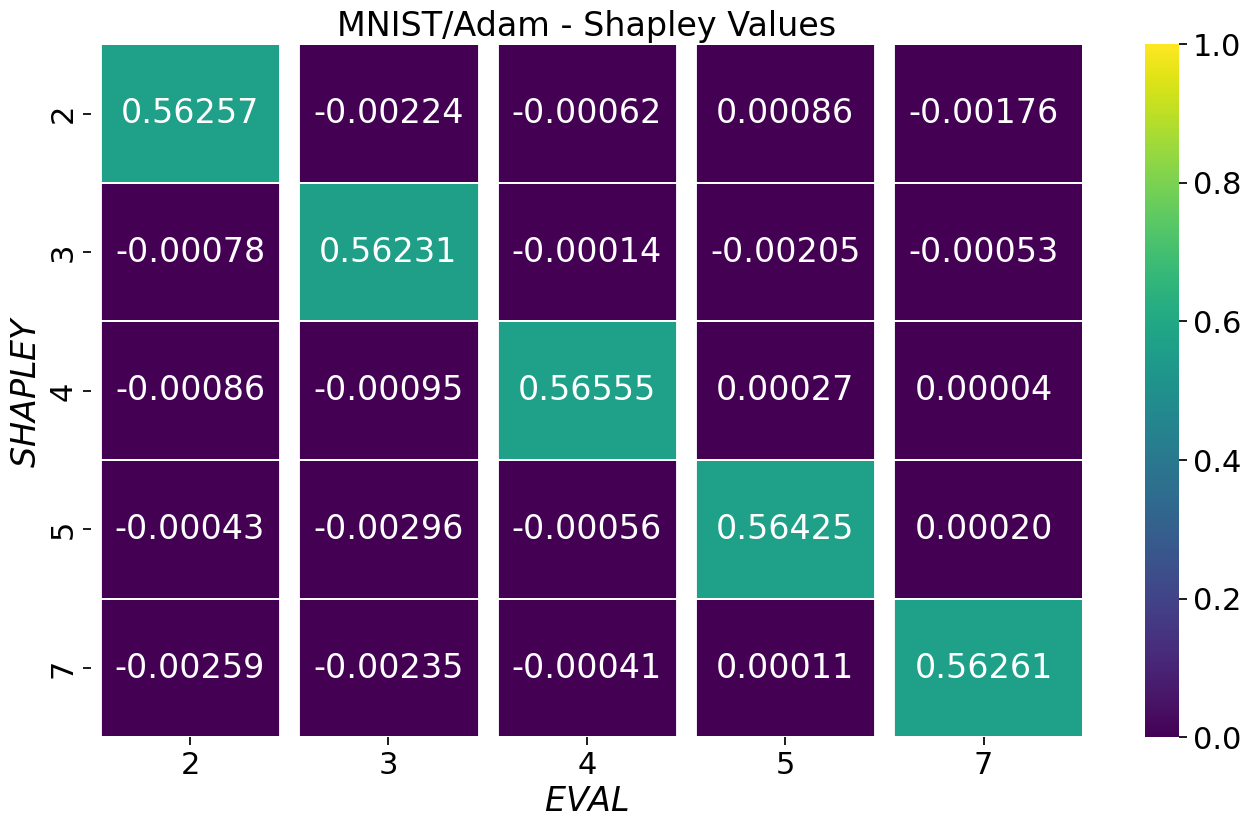

In [210]:
for result in TRAINER_RESULTS:
    display_shapley(TRAINER_RESULTS[result], result)

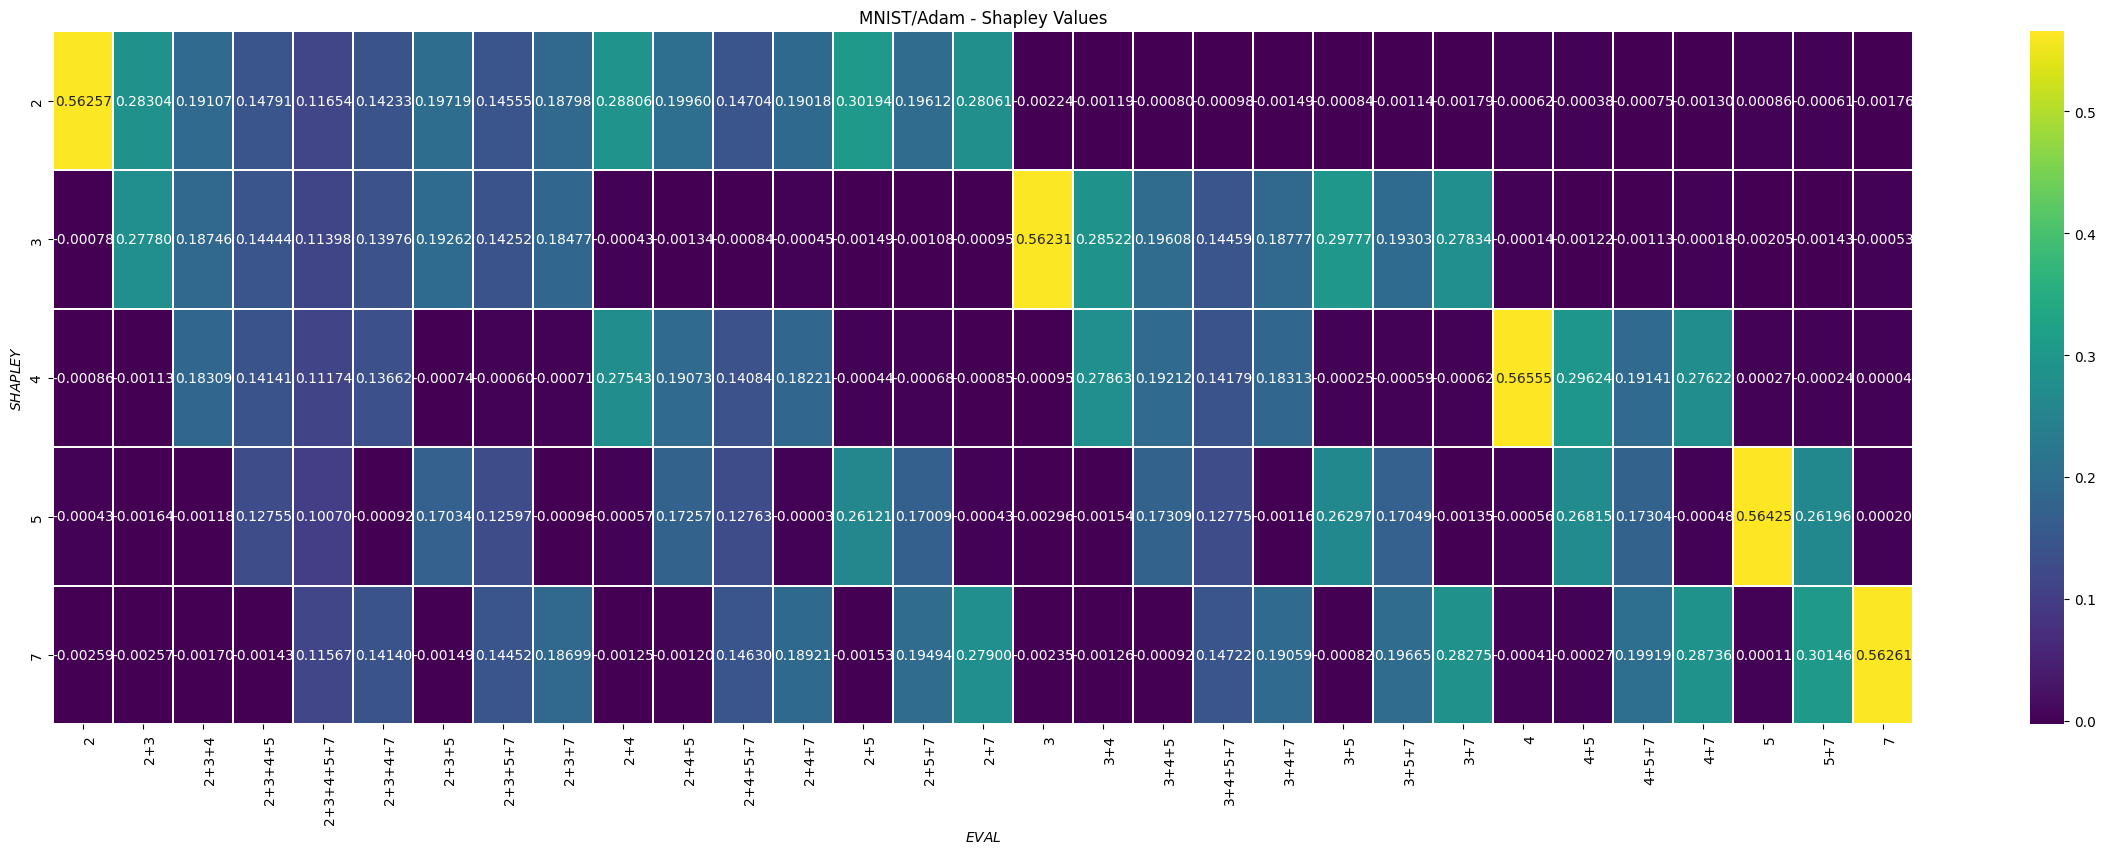

In [21]:
for result in TRAINER_RESULTS:
    display_shapley(TRAINER_RESULTS[result], result, pure_only=False)

In [13]:
df = pd.read_csv(
    TRAINER_RESULTS['MNIST/Adam'],
    index_col=0
)
df.head()

,2,2+3,2+3+4,2+3+4+5,2+3+4+5+7,2+3+4+7,2+3+5,2+3+5+7,2+3+7,2+4,...,3+5,3+5+7,3+7,4,4+5,4+5+7,4+7,5,5+7,7
2,0.562573,0.283043,0.191069,0.147913,0.116545,0.142328,0.197190,0.145549,0.187979,0.288062,...,-0.000836,-0.001144,-0.001793,-0.000623,-0.000384,-0.000751,-0.001299,0.000859,-0.000610,-0.001757
3,-0.000785,0.277800,0.187460,0.144436,0.113983,0.139763,0.192623,0.142521,0.184771,-0.000431,...,0.297773,0.193031,0.278337,-0.000136,-0.001218,-0.001132,-0.000185,-0.002050,-0.001433,-0.000527
4,-0.000859,-0.001130,0.183086,0.141407,0.111742,0.136624,-0.000741,-0.000598,-0.000714,0.275427,...,-0.000245,-0.000588,-0.000619,0.565550,0.296235,0.191414,0.276219,0.000273,-0.000237,0.000037
5,-0.000428,-0.001640,-0.001178,0.127549,0.100704,-0.000924,0.170336,0.125965,-0.000960,-0.000566,...,0.262969,0.170486,-0.001348,-0.000563,0.268154,0.173040,-0.000481,0.564247,0.261964,0.000196
7,-0.002587,-0.002569,-0.001699,-0.001425,0.115668,0.141402,-0.001491,0.144519,0.186991,-0.001252,...,-0.000824,0.196655,0.282754,-0.000406,-0.000271,0.199186,0.287356,0.000108,0.301459,0.562612


In [14]:
df.sum(axis=1)

2    3.562702
3    3.514418
4    3.478816
5    3.243750
7    3.546196
dtype: float64

In [15]:
df['2+3+4+5+7']

2    0.116545
3    0.113983
4    0.111742
5    0.100704
7    0.115668
Name: 2+3+4+5+7, dtype: float64